In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
#Importing requied Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading Dataset

data = pd.read_csv("C:\Sharath\TASK\Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [4]:
# shape of the data
data.shape

(6362620, 11)

In [5]:
# Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Describe the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Data Analysis :** 

We can do analysis only on numerical features but in the above dataset we have categorical features.  

There are 2 ways to handle the categorical data
                    
1 Convert into dumy variables 
                    
2 By using Labelencoder, We can convert categorical data into numerical

Note : In the above the dataset, Features which is in object datatype doesnt make any weightage on model so we are droping the object feature

Type Feature : Type feature is also having categorical data but type feature may have weightage on model so converting into numerical by using Labelecoder.

**Scaling :** : 

If the data is in unstructured, Scale the data before building the model

In [7]:
dataset = data.drop(['nameOrig','nameDest'],axis=1)
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [8]:
# Converting categorical into numerical value by using LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset['type'] = encoder.fit_transform(dataset['type']).astype('int')

# 1 Data Cleaning : Missing Values, Outliers, Multi Colinearity

**Missing Values :** 

In [9]:
# Checking for missing values and data types

dataset.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Outliers :** 
Outliers can detect by using three methods :
**1** Boxplot            **2** Z score          **3** IQR

Note : Among all of these IQR is the best method to detect the exact outliers.

<AxesSubplot:xlabel='newbalanceDest'>

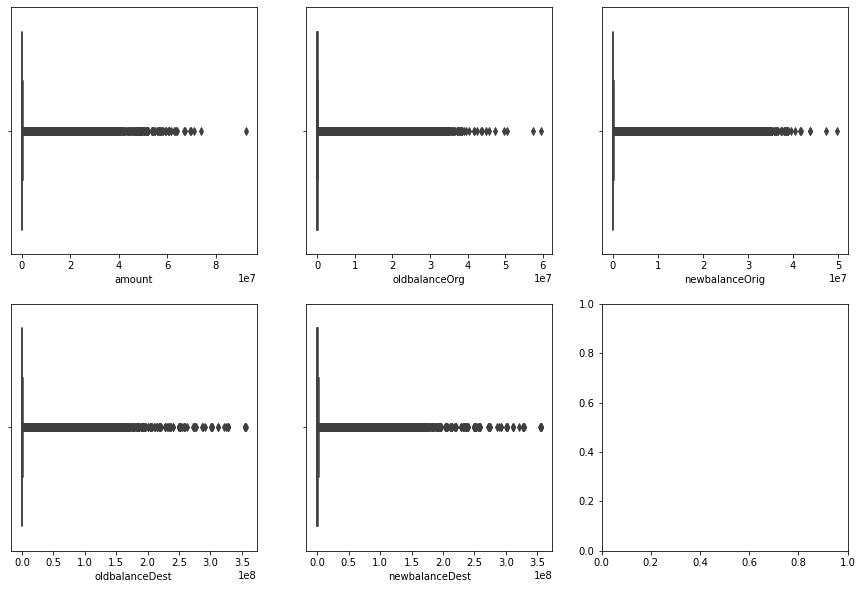

In [10]:
# Boxplot 

fig,axe = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
axe = axe.flatten()

sns.boxplot(data['amount'],ax=axe[0])
sns.boxplot(data['oldbalanceOrg'],ax=axe[1])
sns.boxplot(data['newbalanceOrig'],ax=axe[2])
sns.boxplot(data['oldbalanceDest'],ax=axe[3])
sns.boxplot(data['newbalanceDest'],ax=axe[4])

**NOTE :** 

Removing the outliers is not a good work because the model doesnt learn the patterns of the outliers and it may cause the overfitting for future transactions. So sometimes good to keep the some acceptable outliers in the data and check the impact of it (Accuracy of the model ). If the model is giving worse results then work on outliers and build the model. Here I am not going to handle the outliers. Just building the model with outliers and seeing the results.

**Treating the outliers :**

We can handle the outliers by using the 3 methods

**1** Removing the outliers  **2** Quantile based flooring and capping  **3** Replacing with mean/median.

**Multicolinearity** :

Multicolinearity is the occurence of high intercorrelation among two or more independent variables.

<AxesSubplot:>

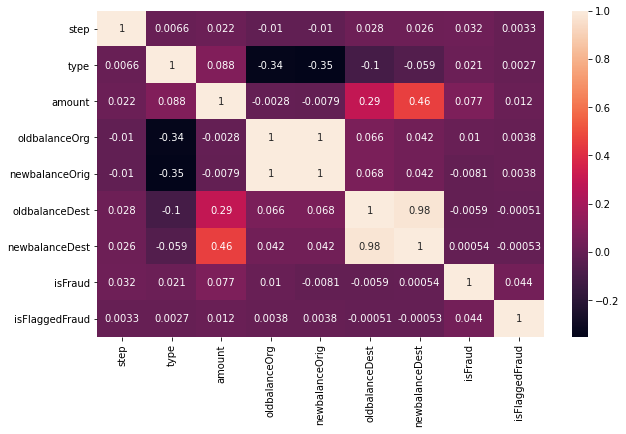

In [12]:
#Multicolinearity 

correlation = dataset.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

**newbalaceDest and oldbalanceDest having the high colinearity = 0.98**

**newbalaceOrig and oldbalanceOrig having the high colinearity = 1**

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
x = dataset[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

          feature         VIF
0            step    2.235192
1            type    2.075263
2          amount    4.015720
3   oldbalanceOrg  480.228469
4  newbalanceOrig  483.731350
5  oldbalanceDest   72.097182
6  newbalanceDest   83.582019
7  isFlaggedFraud    1.000571


**VIF :** Variation Influence factor is used to check the collinearity between 'input varaibles'. High VIF value(Feature) will remove it from dataset

# 2 Describing the fraud detection model in eloboration
# Model : RandomForest

**Random Forest :** It is an ensemble classifier made using many **Decision Tress**.

**Ensemble Model :**
It is used to combine the results from different models(Same type). The resuls from an ensemble model is usually better than the result from the individual model.

**Working principle :**

Each tree is given as follow as 

N = No. of obervations

M = No. of attributes or variables

RandomForest automatically choose the 'm' from the 'M' i.e (m << M)

RanodmForest automatically choose the (2/3) of data from N and build the each decision tree with 'm' and (2/3) data with replacement.

Remaining left over data can be used to know the significance of i/p variable.

**Steps to build the model :**

1 Load the dataset.

2 Separate the independent variables and target variable respectively.

3 If the independent variables has categorical(object) data convert into dummy variables or by using the LabelEncoder convert into numerical value.

3 Perform the **EDA** on the independent feature.

4 Split the records for train and test.

4 Build the model on training data.

5 Predict the values on test data.

6 Check the metric evaluations for test data (Accuracy score, Confusion matrix, Classification report).

7 You can get to know whether the model is good or bad by seeing the Accuracy score or Confusion matrix or Classification 
report.


.


**Decision Tree :** Decision Tree has three nodes **1** Root Node **2** Internal Node **3** Terminate or leaf Node 

**Working Principle :**

Each  **Root Node** can be select by  statistical measure term called **Gain**.

**Gain** can be calculated by using the below formula :

Gain(A) = Info(D) - Info(D)given attribute

# 3. Model Building : RandomForest

In [16]:
# Assigning the feature and target vaiable respectively
# x is feature and y is target

x = dataset.drop('isFraud',axis=1)
y = dataset['isFraud']

In [17]:
# Splitting records for training and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=12)

In [18]:
# Model building using random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [19]:
# Prediction
ypred = rfc.predict(xtest)

In [20]:
# Evaluation Metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Accuracy :",accuracy_score(ytest,ypred));print()
print("Confusion Matrix :\n",confusion_matrix(ytest,ypred));print()
print("Classification Report :\n",classification_report(ytest,ypred))

Accuracy : 0.9997176215667969

Confusion Matrix :
 [[1906265      31]
 [    508    1982]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906296
           1       0.98      0.80      0.88      2490

    accuracy                           1.00   1908786
   macro avg       0.99      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



# 4 Selecting the variable to include in model by using feature_importance in RandomForest

<AxesSubplot:xlabel='Features', ylabel='Importance'>

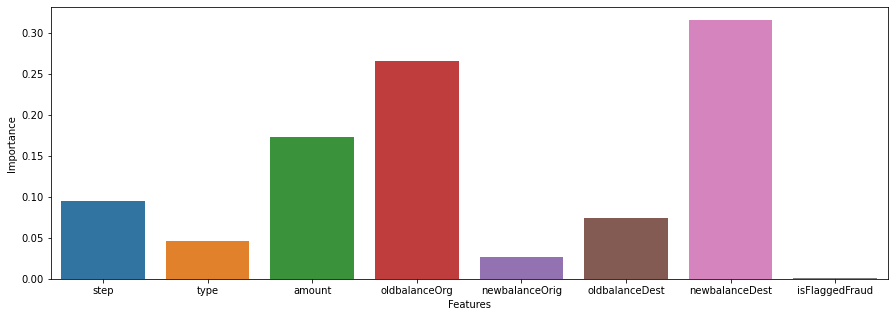

In [22]:
#Feature Importance by using the feature_importance

importance = rfc.feature_importances_
final_df = pd.DataFrame({'Features':x.columns,'Importance':importance})


plt.figure(figsize=(15,5))
sns.barplot('Features','Importance',data=final_df)

In [ ]:
importance = rfc.feature_importances_ 

# 5 Key factors to predict the fraudulent customer

**The below features are the main key factos to predict the fradulent customer**

**1 Unusual Transcation**

**2 Mode of Transcation**

**2 OldbalanceOrg**

**3 newbalanceDest**

**4 Amount**

# 6 Does key factor make sense ? yes

**1 Unsual Transaction :**

The unusual has the details of the data how much they tranfered to receiver and has the unusual patterns of the data i.e Amount and mode the they used. 

**2 Mode of transcation :**

By the mode of transaction we can able to get to know the fraud transaction by customer (Unusal mode)
 
**3 OldbalanceOrg and NewbalanceDest :**

The old balance will let us know whether the amount is debited from account or not and newbalance in the receiver account will tell us know whether the transaction is really happend between the (sender and receiver) or not.

**4 Amount :**

Amount will tell us how much has in the account before the tranction.

# 7 Prevention (Update in its company infrastructure)

**Prevention :**

Responsibility for protection forces on banking and componded by mounting **National and International Regulation&Complaince** mandates.

**Payment Risk Management System** should run quickly inorder to find the fraud transaction in a real time before the sophisticated thefts or fraud transaction complete. Perform some secs analysis(Example : Our model) on anonymous transaction or unusual transaction as sets typical and non-typical profile identity and addresses the new thefts immediatly

# 8 Determining the implementation

If a any fraud transaction happened by **Malwares, Trojans, Account takeover, Indentity theft, credit abuse, Data breach)**. The **Payment Risk Management System** will run quickly on fraud transaction and address the new theft (Our model will helps to find the new thefts. It classifies whether the transaction is fraud or not).

A real time cross channel fraud manage solution with flexible approach to integrate with payments platform. A solution with rapid implementation which produces the result faster. One which levarage shared data is use to perform real time analysis as thefts evolved and facilitates easily defining implementations and new rules by **Payment Risk Management System**.